In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from math import sqrt 
import numpy as np
import os
import seaborn as sns; sns.set()
from pylab import*
import re
from datetime import datetime,date
from pylab import rcParams
plt.style.use('ggplot')

df=pd.read_csv('googleplaystore.csv') #google-play-store-apps/googleplaystore.csv
df2 = df

In [23]:
#Cleaning Installs column by removing ',' , '+' and text
df.Installs.value_counts()
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
#df.Installs.value_counts()

In [24]:
#Cleaning Reviews column by removing 'M' and transforming to float
df['Reviews'] = [ float(i.split('M')[0]) if 'M'in i  else float(i) for i in df['Reviews']]
#Cleaning Price column by removing '$' and transforming to float. Price is 0 for Apps that are free
df['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df['Price'] ]
#Cleaning Size column by removing 'M' and transforming to float
#df["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in df["Size"]  ]

In [25]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (bytes, str)) else x) #str is bytes now and unicode is str
df.columns = cols
for i,j in df.Content_Rating.iteritems():
    if(j=='Unrated'):
        df.Content_Rating.loc[i]='Adults only 18+'

C:\Users\Amit\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


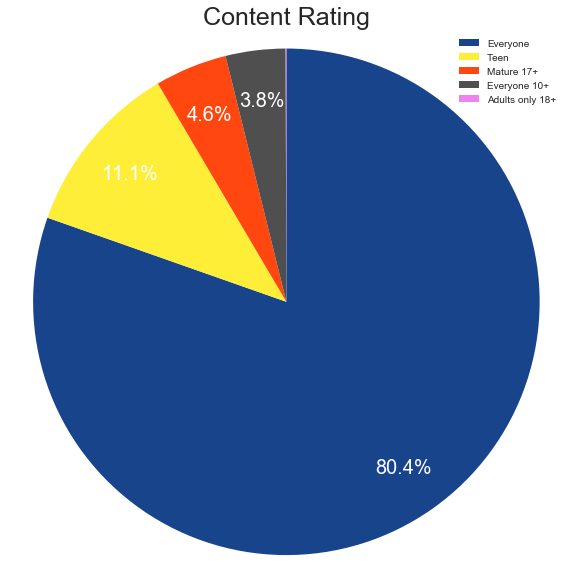

In [26]:
df16 = df
labels =df16['Content_Rating'].value_counts(sort = True).index
sizes = df16['Content_Rating'].value_counts(sort = True)
colors = ["#18448c","#ffee38","#ff470f", "#4f4f4f", "violet", "aqua"]

def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.1f%%' % pct) if pct > limit else ''
    return inner_autopct

#rcParams['figure.figsize'] = 10,10
plt.figure(figsize=(10,10))
patches, texts, autopc = plt.pie(sizes, colors=colors, labels=None, startangle=90, autopct=autopct_generator(3),rotatelabels=True,counterclock=False, pctdistance=0.8,textprops={'fontsize': 20, 'color':'white'})
plt.title('Content Rating',size = 25)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [27]:
for k, l in df.Category.iteritems():
    if l=='1.9':
        df.Category.loc[i]='LIFESTYLE'

C:\Users\Amit\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


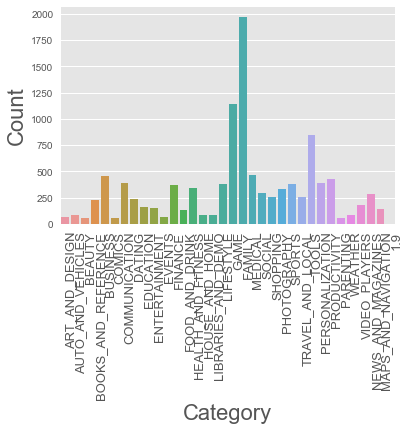

In [28]:
barch = sns.countplot(x="Category",data=df)
#plt.title('Count of app in each category',size = 40)
rcParams['figure.figsize'] = 20,8
#plt.figure(figsize=(30,2))
barch.set_xticklabels(barch.get_xticklabels(), rotation=90, ha="left",fontsize=13)
plt.xlabel("Category", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.show()

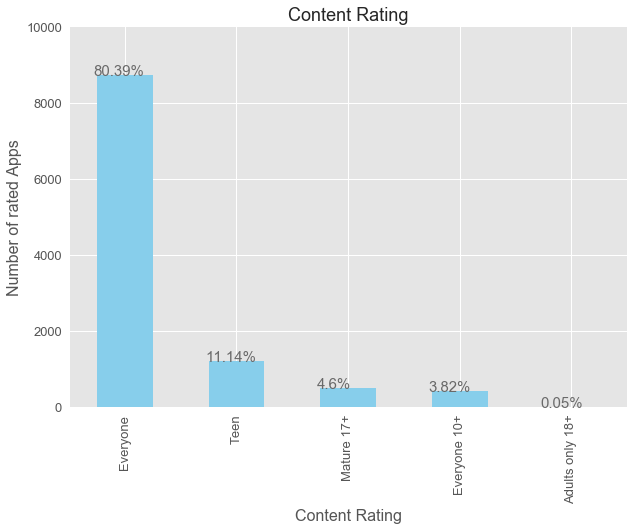

In [29]:
ax = df['Content_Rating'].value_counts().plot(kind='bar', figsize=(10,7),color="skyblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Content Rating", fontsize=18)
ax.set_ylabel("Number of rated Apps", fontsize=16);
ax.set_xlabel("Content Rating", fontsize=16);
ax.set_yticks([0,2000,4000,6000,8000,10000])
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5,str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

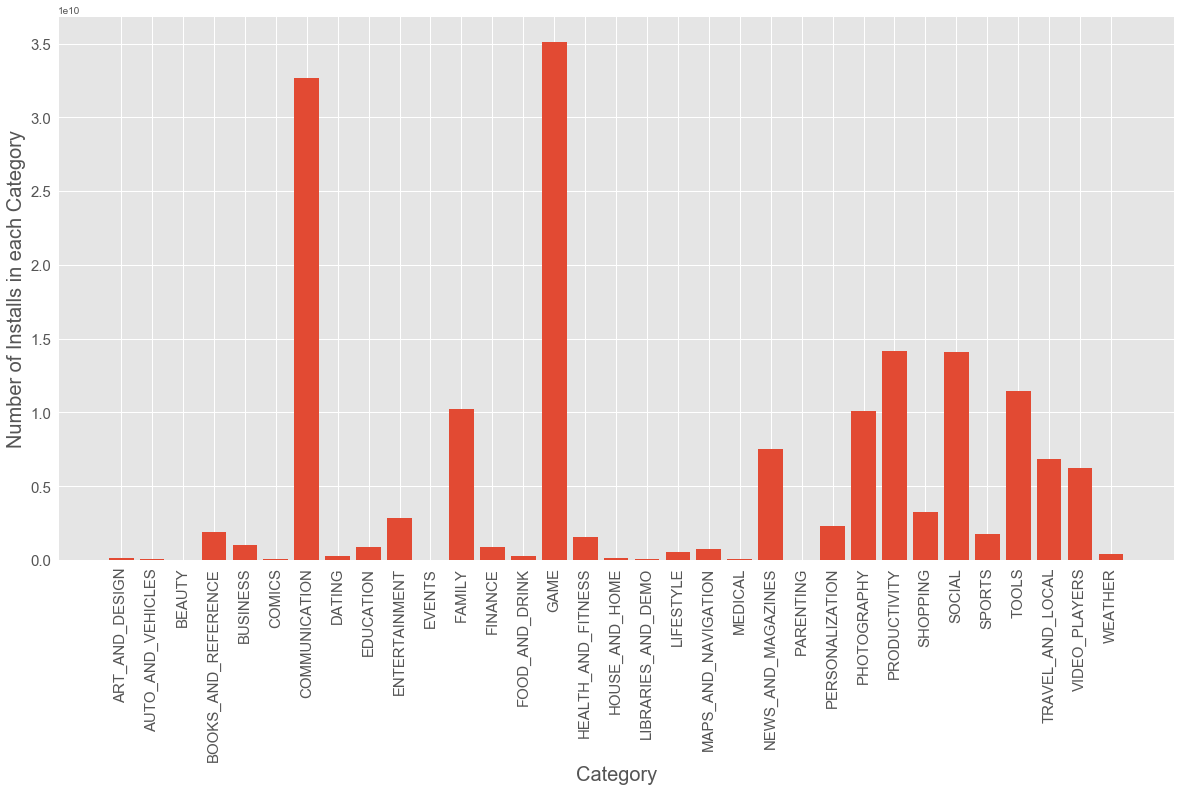

In [30]:
#Comparing 3 most downloaded from top 3 categories
#plt.subplots(figsize=(30,20))
l=[]
d={}
for i,val in df.Category.iteritems():
    if(val not in l):
        l.append(val)
        d[val]=float(df.Installs[i])
    else:
        d[val]=d[val]+float(df.Installs[i])
del(d['1.9'])
plt.figure(figsize=(20,10))
plt.xlabel("Category", fontsize=20)
plt.ylabel("Number of Installs in each Category", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
#plt.ylim(top=40000000000)
plt.bar(d.keys(),d.values())
plt.show()

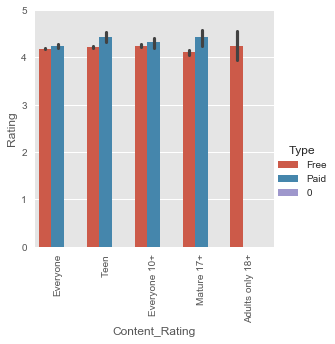

In [31]:
#plt.figure(figsize=(50,30))
rcParams['figure.figsize'] = 20,8
sns.factorplot(x='Content_Rating', y='Rating', hue='Type', data=df, kind="bar")
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.ylim(top=5)
plt.show()

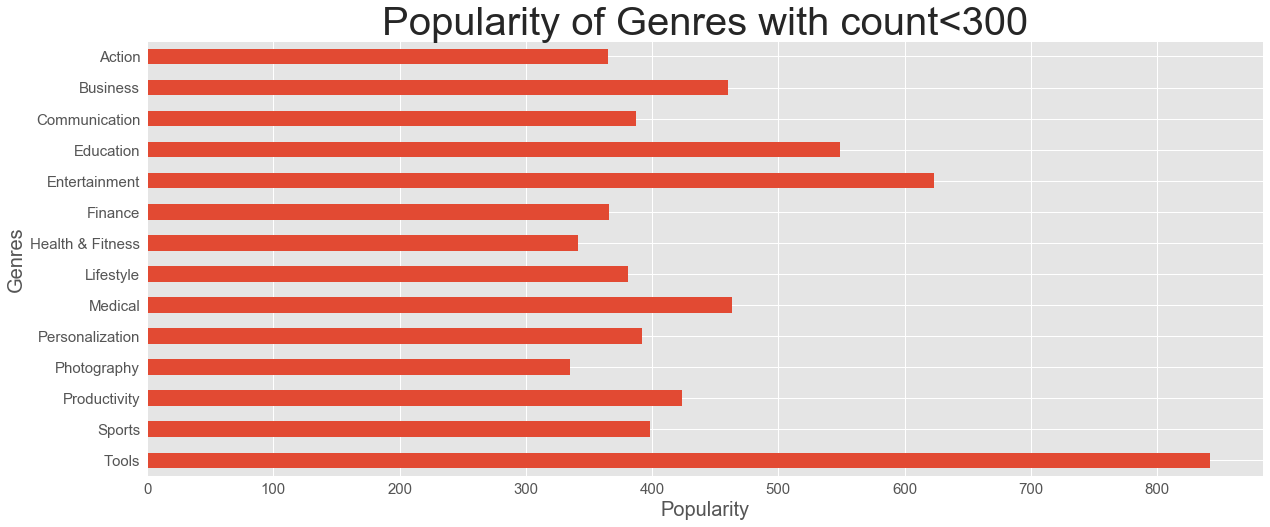

In [32]:
#plt.subplots(figsize=(10,20))
df11 =df
df12 = df11["Genres"].value_counts().sort_index(ascending=False)
for i,j in df12.iteritems():
    if(j<300):
        df12.drop(i, inplace=True)
df12.plot.barh()
plt.title("Popularity of Genres with count<300", fontsize=40)
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Genres", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [33]:
#sort category based on number of installs
rank = sorted(d.items(), key=lambda kv: kv[1])
print("Top 3 Categories",rank[-3:])
#Comparing top 3 categories
gsize={};ginstalls={};gratings={};greviews=0;gp={'Free':0,'Paid':0}
csize={};cinstalls={};cratings={};creviews=0;cp={'Free':0,'Paid':0}
psize={};pinstalls={};pratings={};previews=0;pp={'Free':0,'Paid':0}
for i,val in df.Category.iteritems():
    if(val=='PRODUCTIVITY'):
        pp[df.Type[i]]=pp[df.Type[i]]+1
        psize[df.App[i]]=df.Size[i]
        pinstalls[df.App[i]]=df.Installs[i]
        pratings[df.App[i]]=df.Rating[i]
        previews=previews+df.Reviews[i]
    elif(val=='COMMUNICATION'):
        cp[df.Type[i]]=cp[df.Type[i]]+1
        csize[df.App[i]]=df.Size[i]
        cinstalls[df.App[i]]=df.Installs[i]
        cratings[df.App[i]]=df.Rating[i]
        creviews=creviews+df.Reviews[i]        
    elif(val=='GAME'):
        gp[df.Type[i]]=gp[df.Type[i]]+1
        gsize[df.App[i]]=df.Size[i]
        ginstalls[df.App[i]]=df.Installs[i]
        gratings[df.App[i]]=df.Rating[i]
        greviews=greviews+df.Reviews[i]

Top 3 Categories [('PRODUCTIVITY', 14176091369.0), ('COMMUNICATION', 32647276251.0), ('GAME', 35086024415.0)]


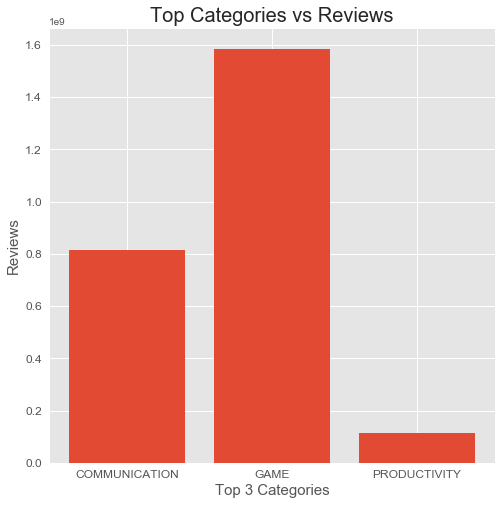

In [34]:
l=['GAME','COMMUNICATION','PRODUCTIVITY']
plt.figure(figsize=(8,8))
plt.title("Top Categories vs Reviews",fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("Top 3 Categories",fontsize=15)
plt.ylabel("Reviews",fontsize=15)
plt.yticks(fontsize=12)
plt.bar(l,[greviews,creviews,previews])
plt.show()

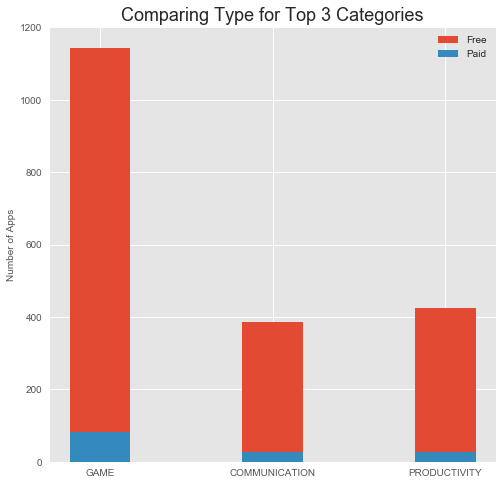

In [35]:
N = 3
free = (gp['Free'],cp['Free'],pp['Free']) 
paid = (gp['Paid'],cp['Paid'],pp['Paid']) 
ind = np.arange(N) 
width = 0.35

plt.figure(figsize=(8,8))
p1 = plt.bar(ind,free, width,bottom=paid) 
p2 = plt.bar(ind,paid, width)


#plt.ylim()
plt.ylabel('Number of Apps',fontsize=10)
plt.title('Comparing Type for Top 3 Categories',fontsize=18) 
plt.xticks(ind, ('GAME', 'COMMUNICATION', 'PRODUCTIVITY'))
plt.legend((p1[0], p2[0]),('Free', 'Paid'))
plt.show()

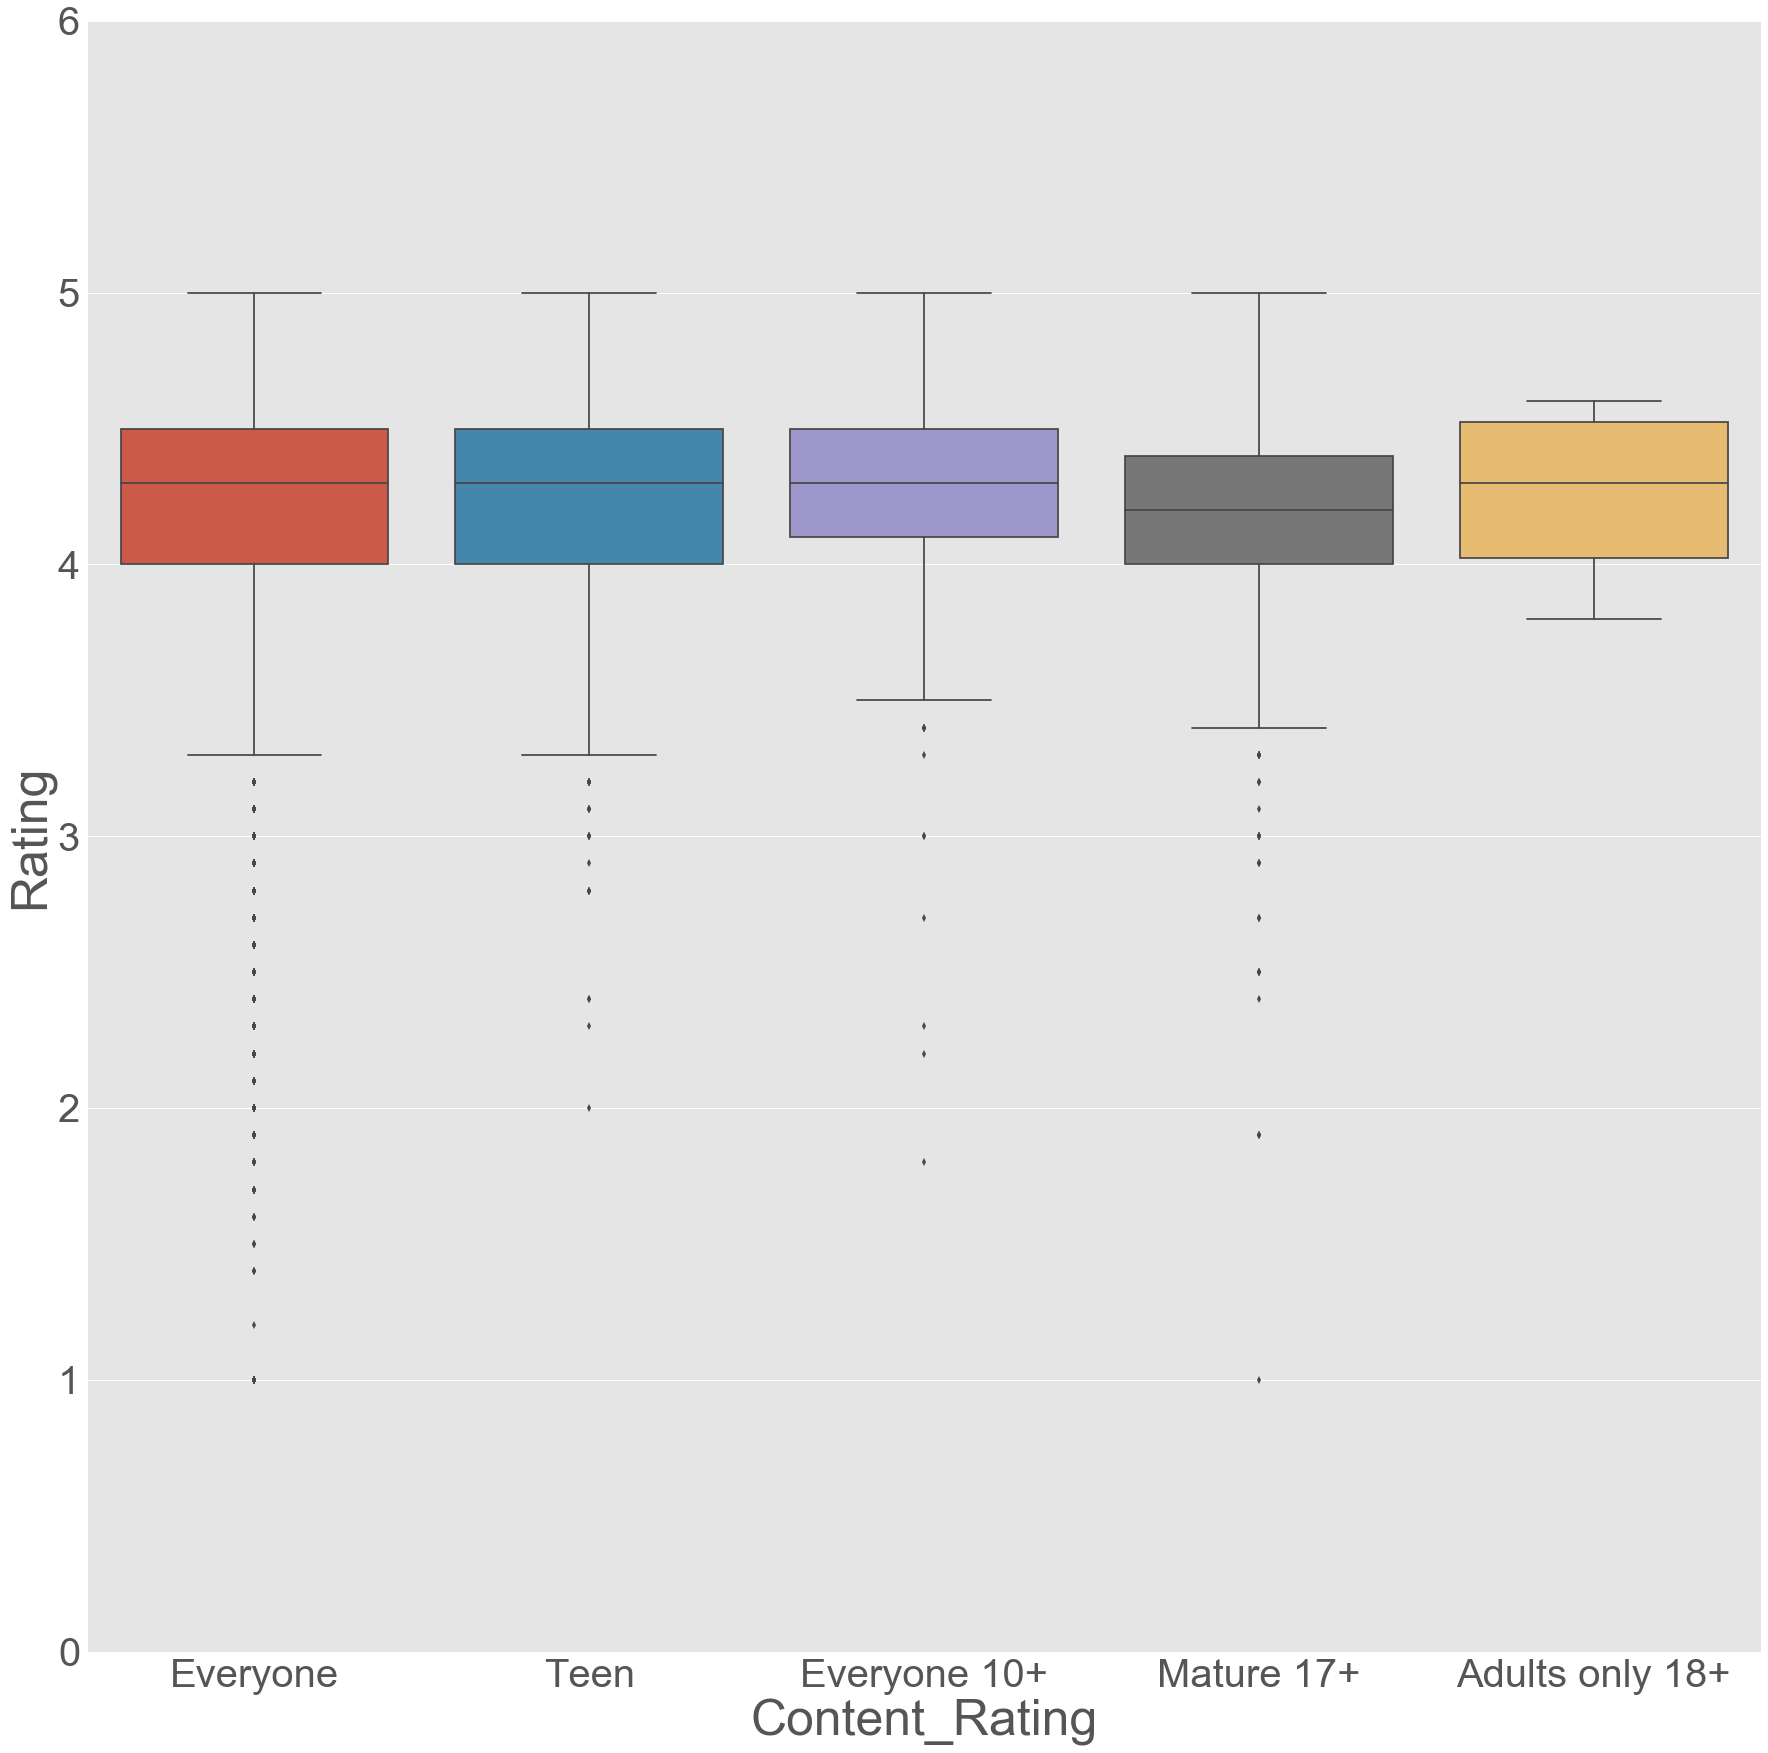

In [36]:
df16 = df
for i,j in df16.Content_Rating.iteritems():
    if(j=='Unrated'):
        df16.Content_Rating.loc[i]='Adults only 18+'
fig = plt.figure(figsize=(30,30))
#plt.title("Rating Vs Content Rating",fontsize=50)
plt.ylim(top=6)
bp=sns.boxplot(x='Content_Rating', y='Rating',data=df16)
plt.xlabel('Content_Rating',fontsize=50)
plt.ylabel('Rating', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

C:\Users\Amit\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


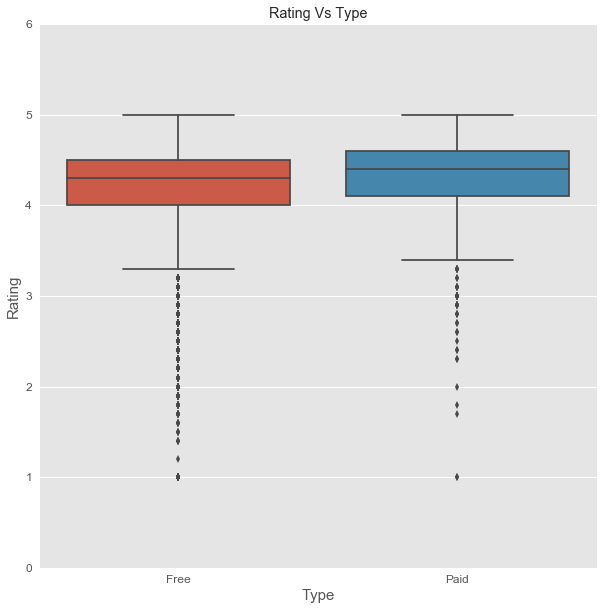

In [37]:
df2 = df
for i, j in df2.Type.iteritems():
    if(j!='Free' and j !='Paid'):
        df2.Type.loc[i]='Free'
fig = plt.figure(figsize=(10,10))
plt.title("Rating Vs Type")
plt.ylim(top=6)
bp=sns.boxplot(x='Type', y='Rating',data=df2)
plt.xticks(fontsize=12)
plt.xlabel("Type",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.yticks(fontsize=12)
plt.show()

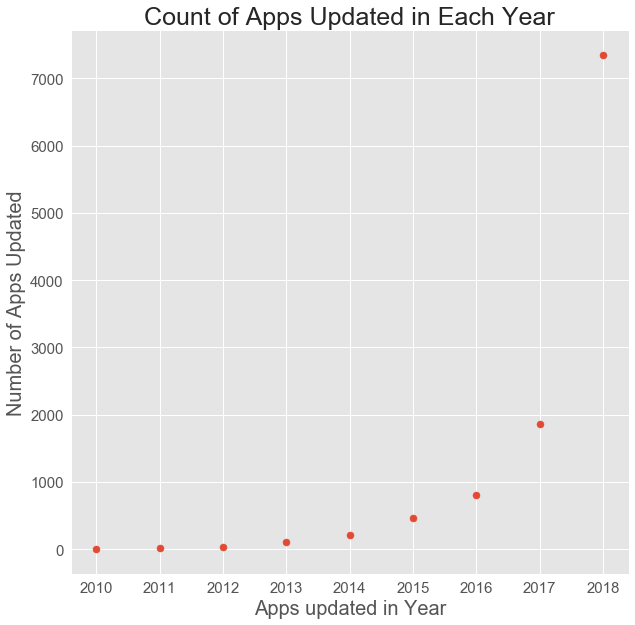

In [38]:
#Change in the growth of app updation
l=[]
d={}
for val in df['Last_Updated']:
    v= val[-4:]
    if(v not in l):
        l.append(v)
        d[v]=1
    else:
        d[v]=d[v]+1
del(d['0.19'])
plt.figure(figsize=(10,10))
plt.scatter(d.keys(),d.values())
#plt.plot(d.keys(),d.values(), linestyle='-', marker='o')
plt.title("Count of Apps Updated in Each Year", fontsize=25)
plt.xlabel("Apps updated in Year", fontsize=20)
plt.ylabel("Number of Apps Updated", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
    

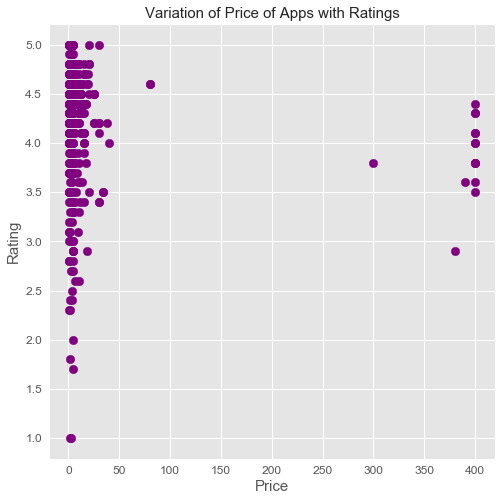

In [39]:
pf = df["Price"]!=0
pa = df[pf]
pa.plot(kind="scatter",x="Price",y="Rating",figsize=(8,8),color="purple",s=70)
plt.title("Variation of Price of Apps with Ratings",fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("Price",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.yticks(fontsize=12)
plt.show()

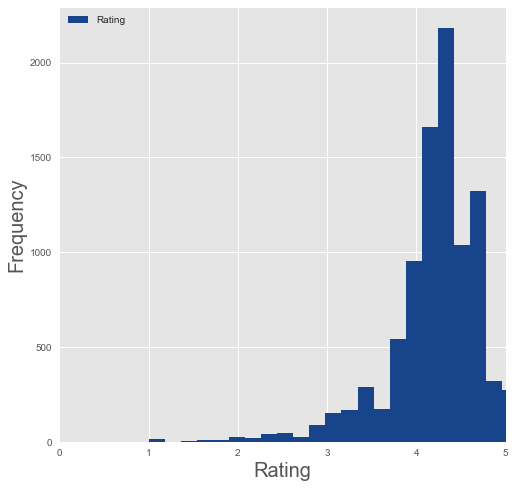

In [40]:
df[["Rating"]].plot(kind="hist",color="#18448c",figsize=(8,8),bins=100, xlim=(0,5))
plt.ylabel("Frequency", fontsize=20);
plt.xlabel("Rating", fontsize=20);
plt.show()

In [41]:
import re
dfsize = df 
def isfloat(value):
    try:
        float(value)
        return True
    except:
        return False
    
for index, row in dfsize.Size.iteritems():
    y=re.split("[k|Varies with device|M]",row)
    if(isfloat(y[0])):    
        dfsize.Size.loc[index] = float(y[0])
    else:
        dfsize.Size.loc[index] = np.nan

C:\Users\Amit\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
dfsize1 = dfsize
for i, j in dfsize1.Size.iteritems():
    if(np.isnan(j)):
        continue
    elif(j>101):    
        dfsize1.Size.loc[i] = j/1000
    else:
        dfsize1.Size.loc[i] = j

dfsize1.Size=dfsize1.Size.fillna(np.median(dfsize1.Size))

C:\Users\Amit\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


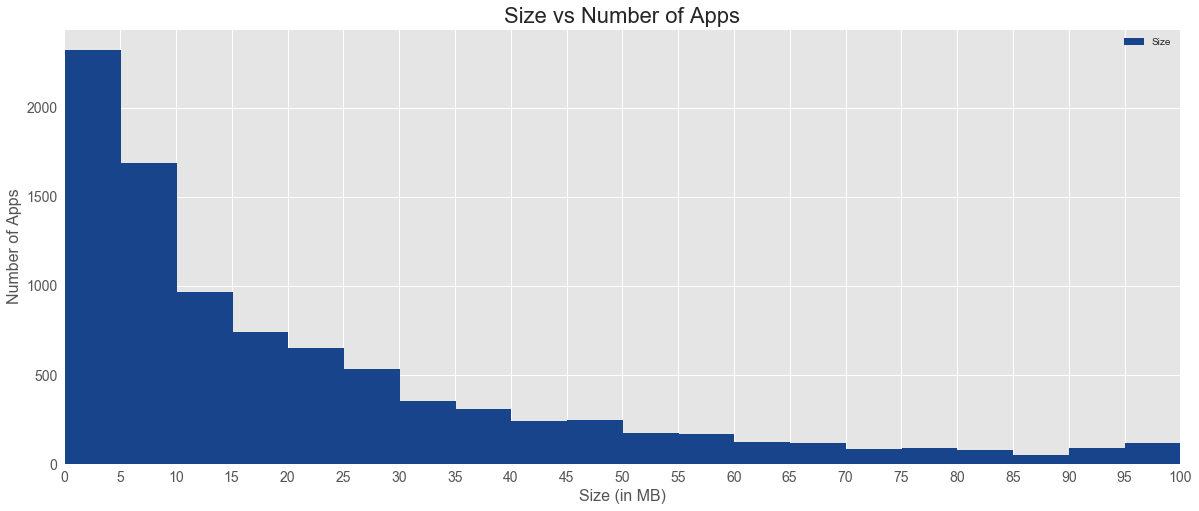

In [44]:
dfsize1[["Size"]].plot(kind="hist",color="#18448c",figsize=(20,8),bins=20, xlim=(0,100))
plt.locator_params(axis='x', nbins=20)
plt.title("Size vs Number of Apps", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Apps", fontsize=16);
plt.xlabel("Size (in MB)", fontsize=16);
plt.show()

#dfsize1[["Size"]].plot(kind="hist",color="#18448c",figsize=(20,8),xlim=(0,100))
#plt.locator_params(axis='x', nbins=10)
#plt.title("Size vs Number of Apps", fontsize=22)
#plt.ylabel("Number Apps", fontsize=16);
#plt.xlabel("Size (in MB)", fontsize=16);
#plt.show()

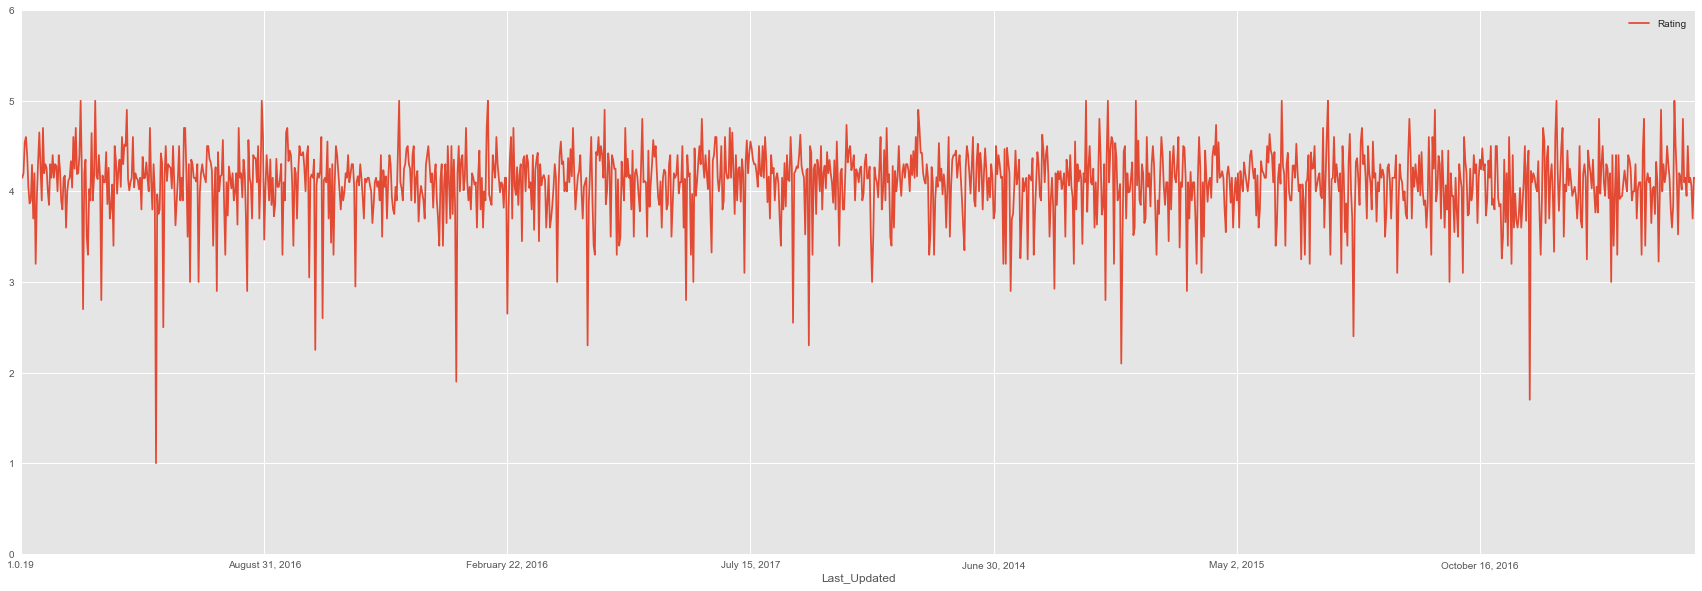

In [47]:
df100 = df
df100 = df100.groupby('Last_Updated').mean()
df100
for i, j in df100.Rating.iteritems():
    if(j > 10 or np.isnan(j)):
        df100.Rating.loc[i]=np.nanmedian(df100.Rating)
    else:
        continue
df100.Rating = df100.Rating.fillna(np.nanmedian(df100.Rating)) 
df100.plot(y='Rating',figsize=(30,10),ylim=(0,6))

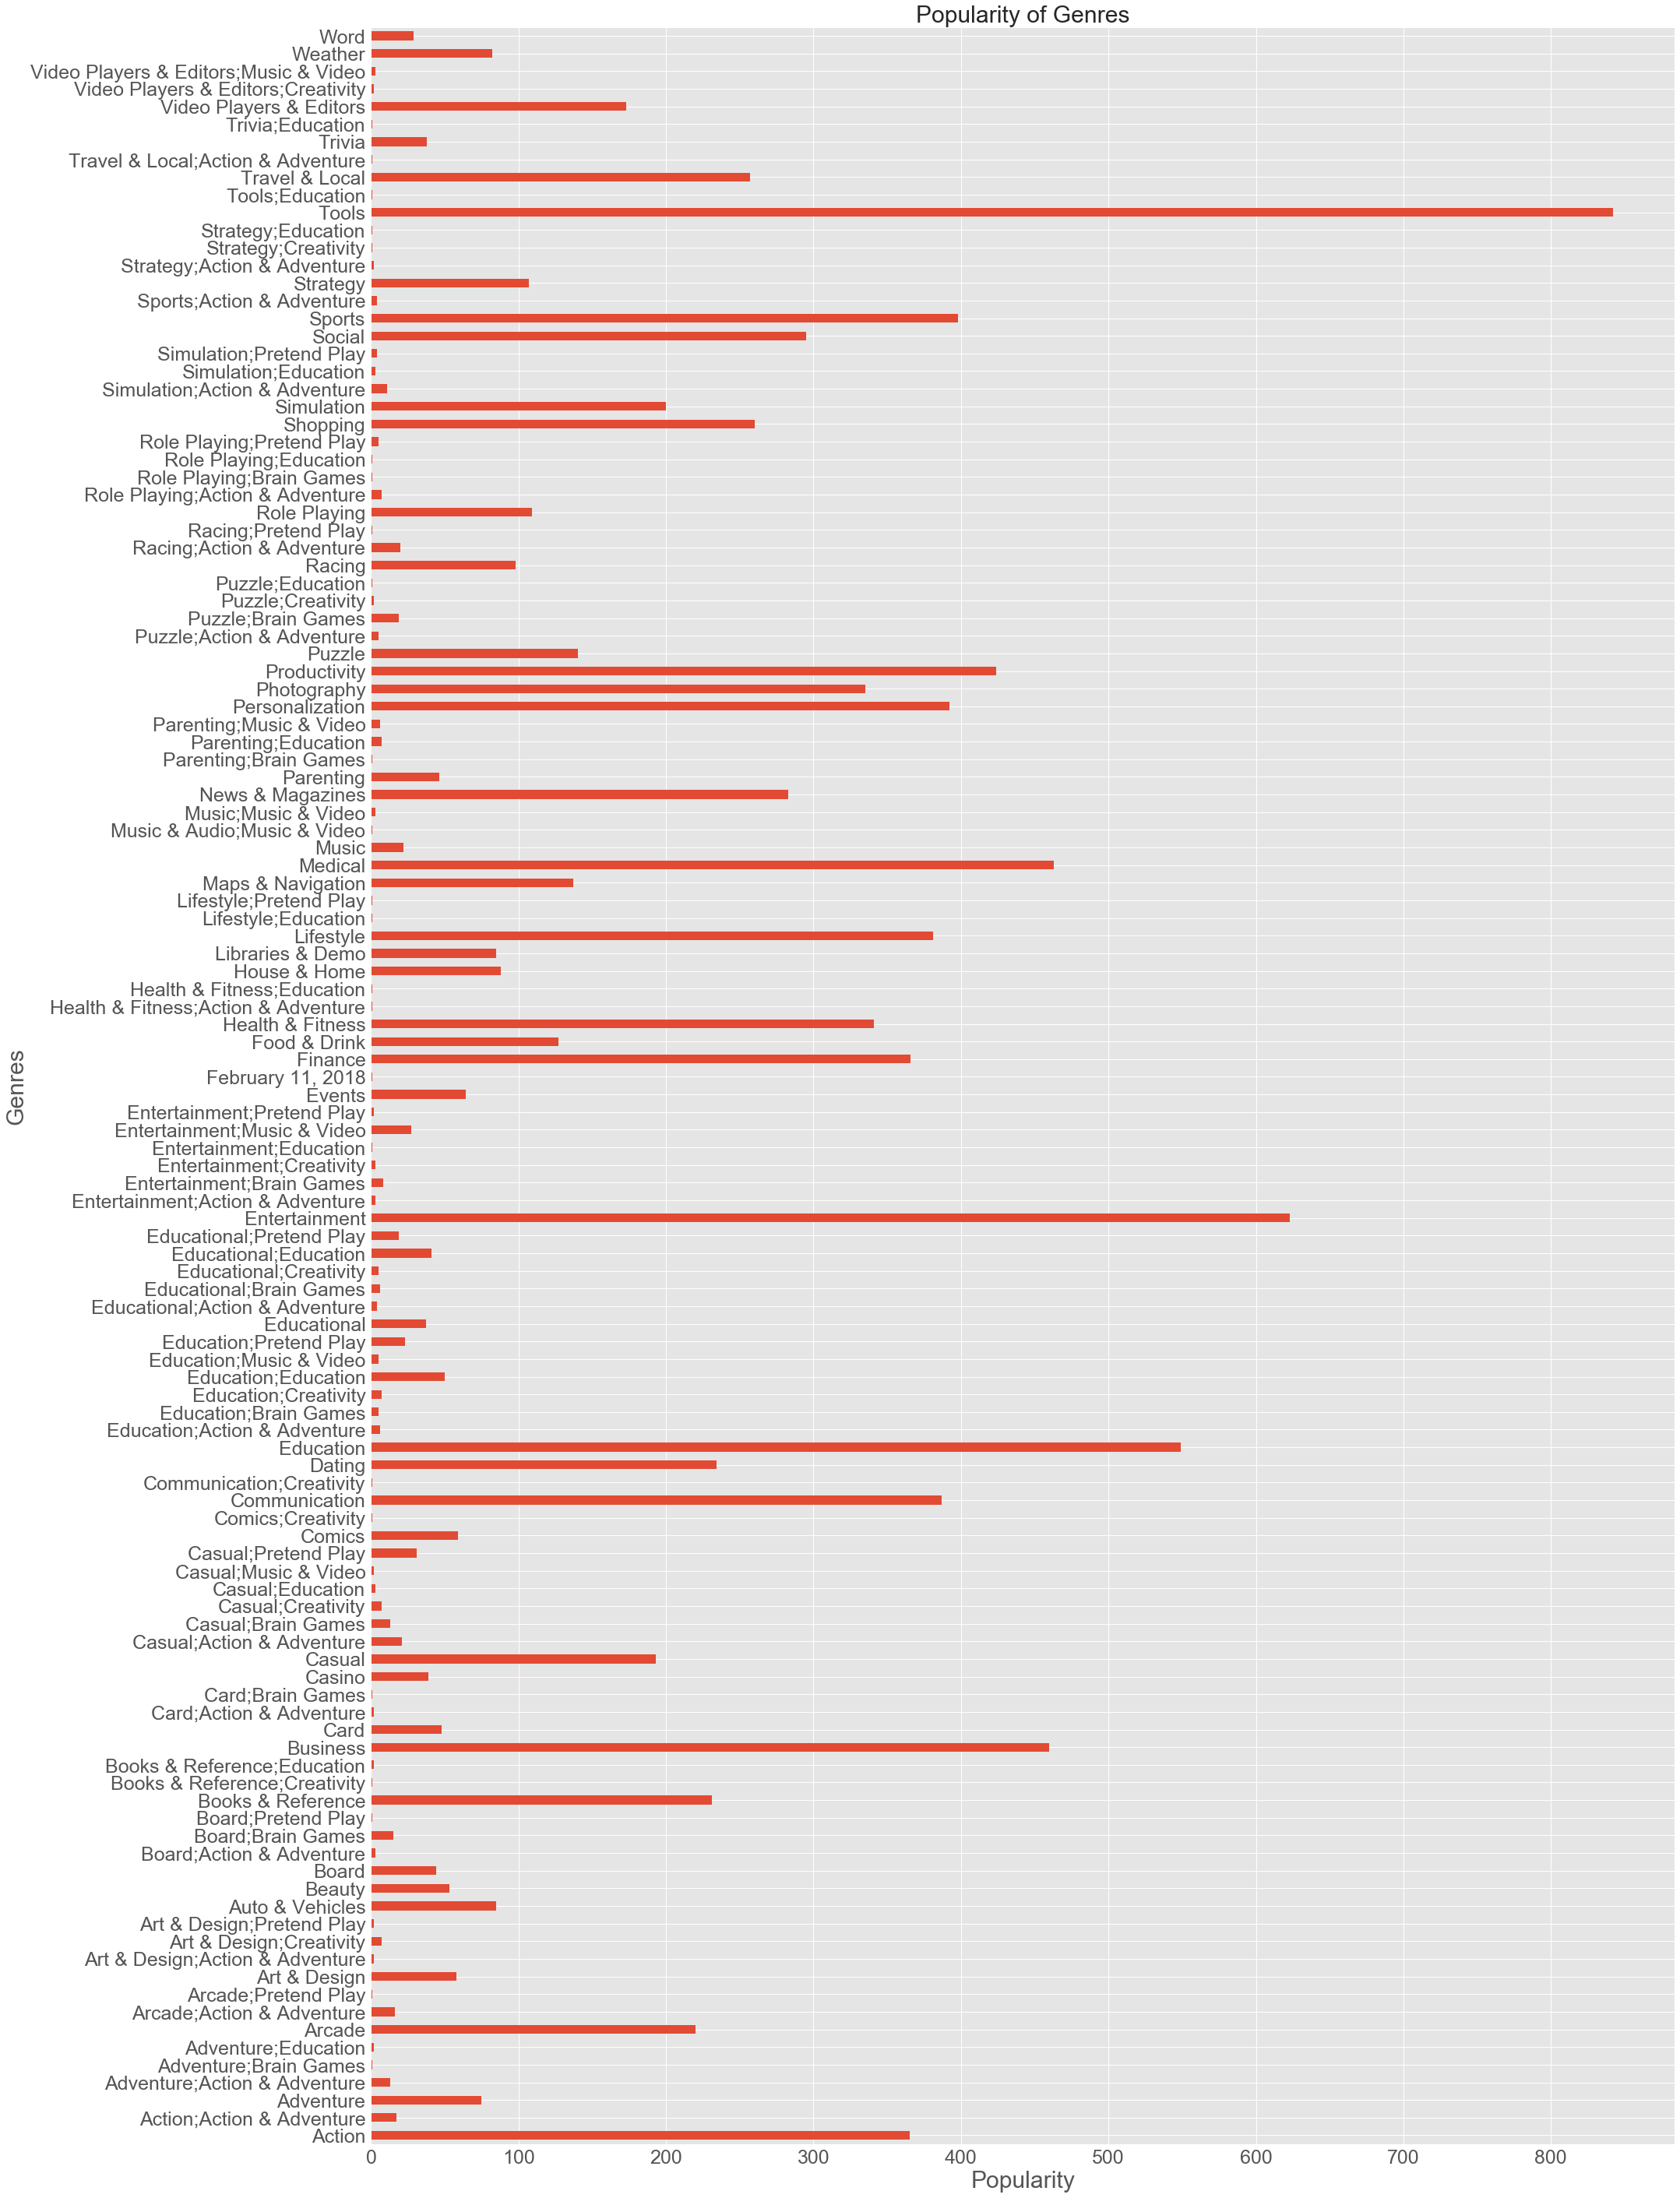

In [48]:
plt.subplots(figsize=(30,50))
df["Genres"].value_counts().sort_index().plot.barh()
plt.title("Popularity of Genres", fontsize=30)
plt.xlabel("Popularity", fontsize=30)
plt.ylabel("Genres", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

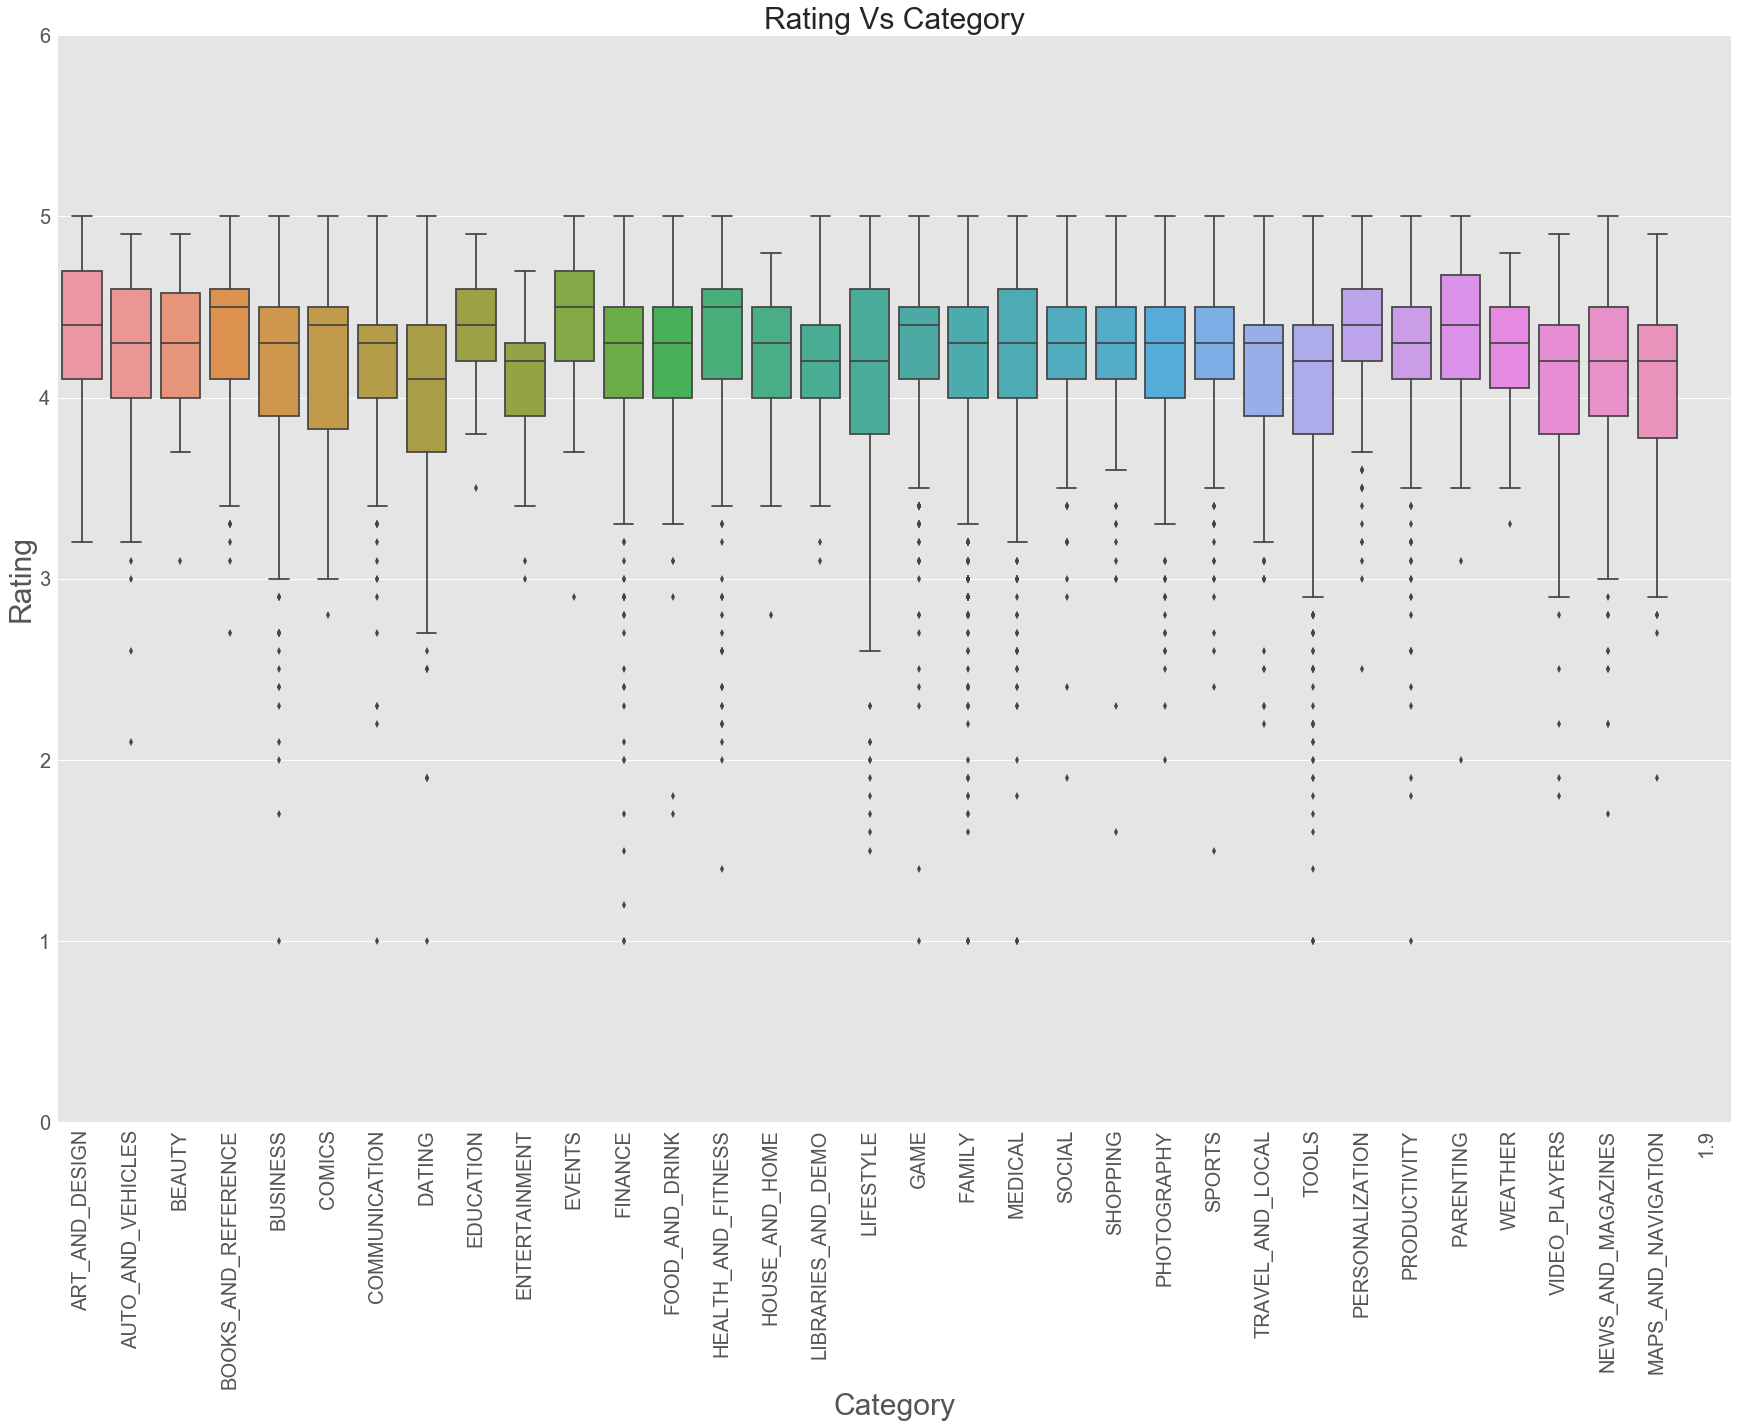

In [49]:
fig = plt.figure(figsize=(30,20))
plt.title("Rating Vs Category",fontsize=30)
plt.xlabel('Category', fontsize=30)
plt.ylabel('Rating', fontsize=30)
plt.ylim(top=6)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
bp=sns.boxplot(x='Category', y='Rating', data=df)
plt.show()